## Introduction

In this project, we aim to analyze and predict the salaries of employees based on various features such as age, gender, education level, job title, and years of experience. Understanding these factors can help in making informed decisions regarding salary structures and identifying potential disparities or trends within the company.

### Project Goals

1. **Data Exploration and Visualization**: Gain insights into the dataset by exploring and visualizing the distributions and relationships of different features.
2. **Data Preprocessing**: Prepare the data for machine learning by handling missing values, duplicates, and encoding categorical variables.
3. **Model Training and Evaluation**: Train multiple machine learning models to predict employee salaries and evaluate their performance.

### About the Dataset

This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary. The dataset can be sourced from [Kaggle](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer/data).

**Columns**

- **Age**: Represents the age of each employee in years. The values in this column are numeric.
- **Gender**: Contains the gender of each employee, which can be either male or female. The values in this column are categorical.
- **Education Level**: Contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.
- **Job Title**: Contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.
- **Years of Experience**: Represents the number of years of work experience of each employee. The values in this column are numeric.
- **Salary**: Represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

### Dataset Source

The dataset is available on Kaggle: [Salary Prediction for Beginners](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer/data).


#### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import iplot
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import plotly.io as pio


### Customized Vizualizations Function

In [2]:
def custom_layout(fig, title_size=28, hover_font_size=16, showlegend=False, bargap=None, bgcolor='#111'):
    layout_params = {
        'showlegend': showlegend,
        'title': {
            'text': fig.layout.title.text, 
            'font': {
                'size': title_size,
                'family': 'Arial'
            },
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        'hoverlabel': {
            'bgcolor': bgcolor,
            'font_size': hover_font_size,
            'font_family': 'Arial'
        }
    }
    

    if bargap is not None:
        layout_params['bargap'] = bargap
    
    fig.update_layout(**layout_params)

#### Load the Dataset

In [3]:
df = pd.read_csv('SalaryData.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### Basic Information and Descriptive Statistics


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


### Data Preprocessing 

#### Identify and Handle Missing Values



In [6]:
# Check for missing values
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
df[df["Salary"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


#### Upon inspecting the dataset, we found that rows 172 and 260 are completely empty. Since these rows do not contain any useful information, we have decided to drop them from the dataset to ensure data quality and integrity.

In [8]:
df.dropna(inplace=True)

In [9]:
# Check for missing values again
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

#### Check for duplicates

#### Duplicates are removed from the dataset to avoid bias and redundancy. Keeping duplicate records can skew the model's training process, leading to overfitting and reducing the model's ability to generalize to new, unseen data. By eliminating duplicates, we ensure the model learns from unique and diverse examples, improving its predictive performance.

In [10]:
df.duplicated().sum()

49

In [11]:
df[df.duplicated()].head(20)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


#### Drop duplicates records for a better prediction model

In [12]:
# Drop Duplicates Records
df.drop_duplicates(inplace=True)

# Reset the Index
df.reset_index(inplace=True, drop=True)

In [13]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Visualizing each column

#### Age Distribution Using Histogram with Mean and Median Lines

##### We plotted a histogram to visualize the age distribution in the dataset, enhancing it with vertical lines representing the mean and median ages. This visualization helps to quickly grasp the central tendency and dispersion of the age data, which is crucial for understanding the demographic characteristics of the dataset.

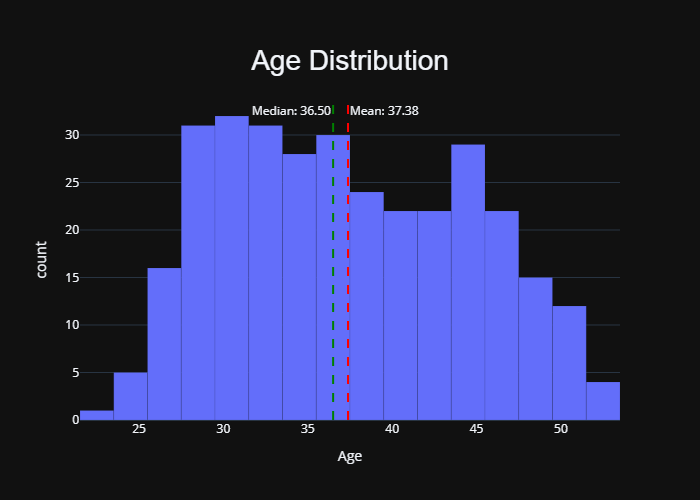

In [46]:
# Create an interactive histogram using Plotly
fig = px.histogram(
    df,
    x='Age',
    nbins=25,
    title='Age Distribution',
    template='plotly_dark',
    labels={'Age': 'Age'}
)

# Calculate the mean and median
mean = df['Age'].mean()
median = df['Age'].median()

# Add vertical lines for mean and median
fig.add_vline(
    x=mean,
    line_width=2,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean: {mean:.2f}",
    annotation_position="top right"
)

fig.add_vline(
    x=median,
    line_width=2,
    line_dash="dash",
    line_color="green",
    annotation_text=f"Median: {median:.2f}",
    annotation_position="top left"
)

custom_layout(fig) 

fig.update_traces(
    hovertemplate='Age: %{x}<br>Frequency: %{y}',
    marker=dict(line=dict(color='#000', width=0.1))
)


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

##### The inclusion of the mean and median lines provides additional insights into the distribution, showing the central values and helping to identify any skewness in the age data.

#### Gender Distribution

##### We calculated the counts and percentages for each gender in the dataset to understand the distribution. The results were visualized using an interactive bar plot created with Plotly. This visualization helps in quickly identifying any gender imbalances in the dataset, which could be important for model fairness and bias analysis.

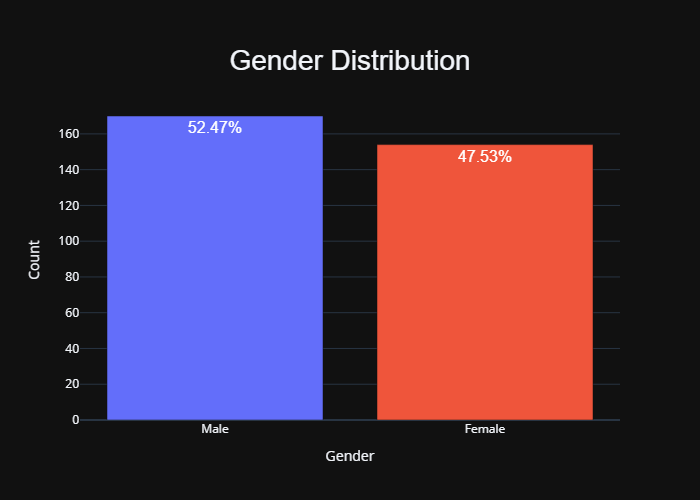

In [15]:
# Calculate the counts and percentages for each gender
gender_counts = df['Gender'].value_counts()
gender_percentages = df['Gender'].value_counts(normalize=True) * 100

# Create a DataFrame for Plotly
gender_counts_df = gender_counts.reset_index()
gender_counts_df.columns = ['Gender', 'Count']
gender_counts_df['Percentage'] = gender_percentages.values

# Create an interactive bar plot using Plotly
fig = px.bar(gender_counts_df, 
             x='Gender', 
             y='Count', 
             color='Gender', 
             title='Gender Distribution',
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=gender_counts_df['Percentage'].apply(lambda x: f"{x:.2f}%"),
             template='plotly_dark')

custom_layout(fig) 

fig.update_traces(
    textfont={
        'size': 16,
        'family': 'Arial',
        'color': '#FFFFFF'
    },
    hovertemplate='<b>Gender</b>: %{x}<br><b>Count</b>: %{y}<br><b>Percentage</b>: %{text}<extra></extra>'
)


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

##### This visualization not only shows the count of each gender but also displays the percentage of the total dataset they represent, providing a clear picture of gender representation.

#### Education Level Distribution


##### We analyzed the distribution of education levels within the dataset by calculating the counts and percentages for each level. This information was visualized using an interactive bar plot created with Plotly. This visualization helps in understanding the educational background of the dataset's population, which can be a crucial factor in many analyses.

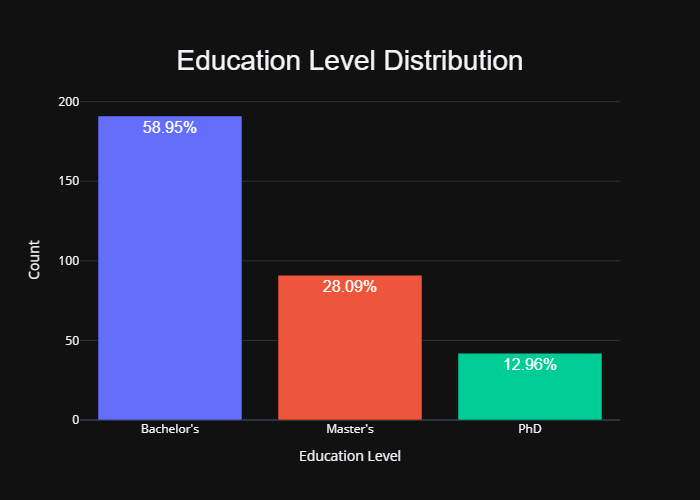

In [16]:
# Calculate the counts and percentages for each education level
education_counts = df['Education Level'].value_counts()
education_percentages = df['Education Level'].value_counts(normalize=True) * 100

# Create a DataFrame for Plotly
education_counts_df = education_counts.reset_index()
education_counts_df.columns = ['Education Level', 'Count']
education_counts_df['Percentage'] = education_percentages.values

# Create an interactive bar plot using Plotly
fig = px.bar(education_counts_df, 
             x='Education Level', 
             y='Count', 
             color='Education Level', 
             title='Education Level Distribution',
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=education_counts_df['Percentage'].apply(lambda x: f"{x:.2f}%"),
             template='plotly_dark')


custom_layout(fig) 

fig.update_traces(
    textfont={
        'size': 16,
        'family': 'Arial',
        'color': '#FFFFFF'
    },
    hovertemplate='<b>Education Level</b>: %{x}<br><b>Count</b>: %{y}<br><b>Percentage</b>: %{text}<extra></extra>'
)


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

##### This bar plot not only shows the count of each education level but also provides the percentage of the total dataset they represent. This dual representation allows for a more comprehensive understanding of the educational demographics.

#### Experience Distribution

##### We visualized the distribution of years of experience in the dataset using an interactive box plot created with Plotly. This plot helps to understand the spread and central tendency of the experience data, highlighting any potential outliers.

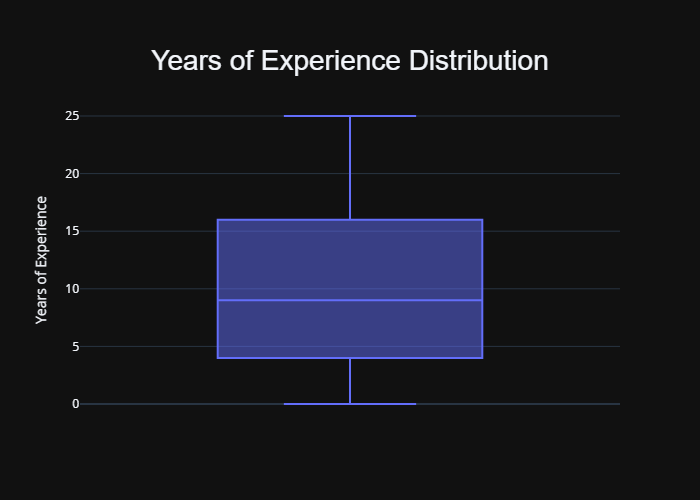

In [42]:
# Create an interactive box plot using Plotly
fig = px.box(
    df, 
    y='Years of Experience', 
    title='Years of Experience Distribution', 
    template='plotly_dark',
    labels={'Years of Experience': 'Years of Experience'}
)

custom_layout(fig) 


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

##### The box plot provides a clear summary of the experience data, including the median, quartiles, and any outliers. This visualization is useful for identifying the overall distribution and variability in the years of experience within the dataset.

#### Salary Distribution

##### We visualized the salary distribution in the dataset using an interactive histogram created with Plotly. This plot helps to understand the overall spread and central tendency of salary data.

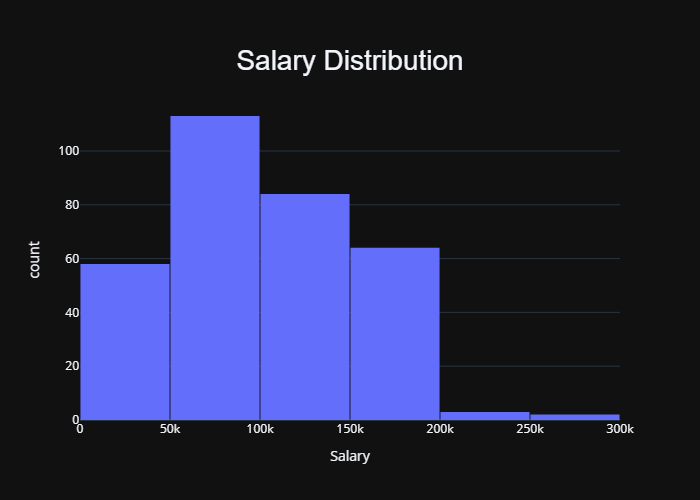

In [18]:
# Create an interactive histogram for Salary distribution
fig = px.histogram(
    df, 
    x='Salary', 
    nbins=10,
    title='Salary Distribution',
    template='plotly_dark',
    labels={'Salary': 'Salary'}
)

custom_layout(fig, bargap=0.01) 

fig.update_traces(
    textfont={
        'size': 16,
        'family': 'Arial',
        'color': '#FFFFFF'
    },
    hovertemplate='<b>Salary</b>: %{x}<br><b>Count</b>: %{y}<extra></extra>'
)


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

##### The histogram shows that there are more counts on the left side, indicating that the salary distribution is skewed to the left. This suggests that a larger number of individuals have salaries on the lower end of the scale. Understanding this skewness is important for further analysis and modeling, as it may affect the assumptions of certain statistical models.

### Asking Questions to Gain Insights about Salary

#### What is the average salary by gender?

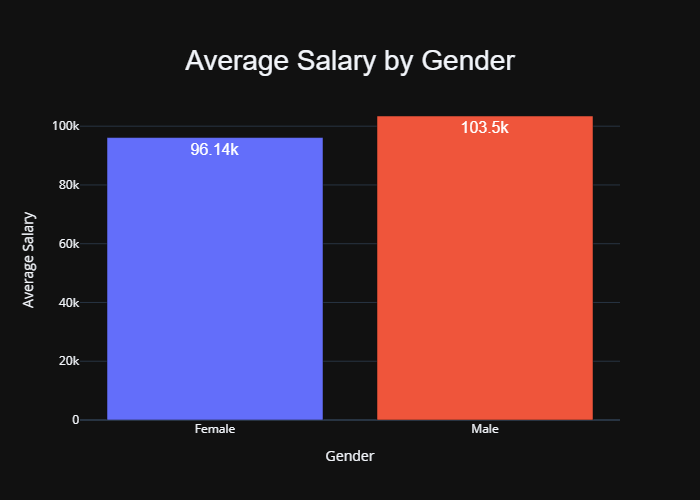

In [19]:
# Create an interactive bar plot for average Salary by Gender
fig = px.bar(
    df.groupby('Gender')['Salary'].mean().reset_index(),
    x='Gender',
    y='Salary',
    color='Gender',
    title='Average Salary by Gender',
    template='plotly_dark',
    labels={'Salary': 'Average Salary'},
    text_auto = "0.4s" 
)

custom_layout(fig) 

fig.update_traces(
    textfont={
        'size': 16,
        'family': 'Arial',
        'color': '#FFFFFF' 
    },
    hovertemplate='<b>Gender</b>: %{x}<br><b>Average Salary</b>: $%{y:0.4s}<extra></extra>'
)



# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

#### How does salary vary with education level?

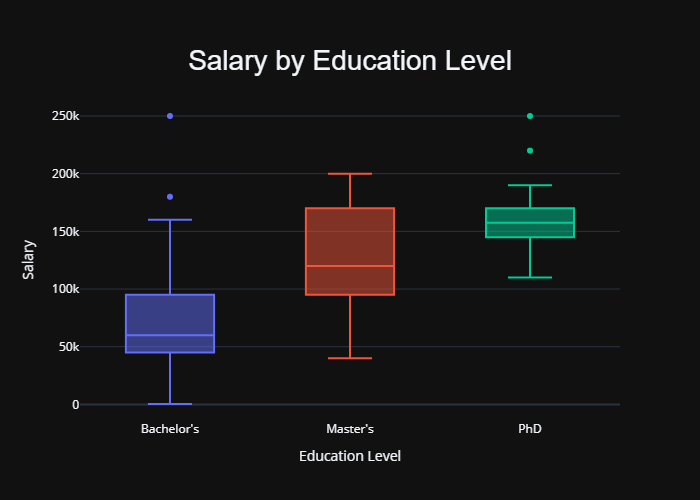

In [20]:
# Create an interactive box plot for Salary by Education Level
fig = px.box(
    df, 
    x='Education Level', 
    y='Salary', 
    color='Education Level',
    title='Salary by Education Level',
    template='plotly_dark',
    labels={'x': 'Salary', 'y': 'Education Level'}
)

custom_layout(fig) 

fig.update_traces(
    hovertemplate='<b>Education Level</b>: %{x}<br><b>Salary</b>: $%{y}<extra></extra>'
)


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")


#### How does salary vary with years of experience?

In [21]:
def grouping_exp(exp):
    """
    Converts years of experience into categories.
    
    Parameters:
    exp (int or float): Number of years of experience.
    
    Returns:
    str: The experience category.
    """

    experience_ranges = [
        (0, 5, "0-5 years"),
        (6, 10, "6-10 years"),
        (11, 15, "11-15 years"),
        (16, 20, "16-20 years")
    ]
    
    for start, end, label in experience_ranges:
        if start <= exp <= end:
            return label
    
    return "20+ years"


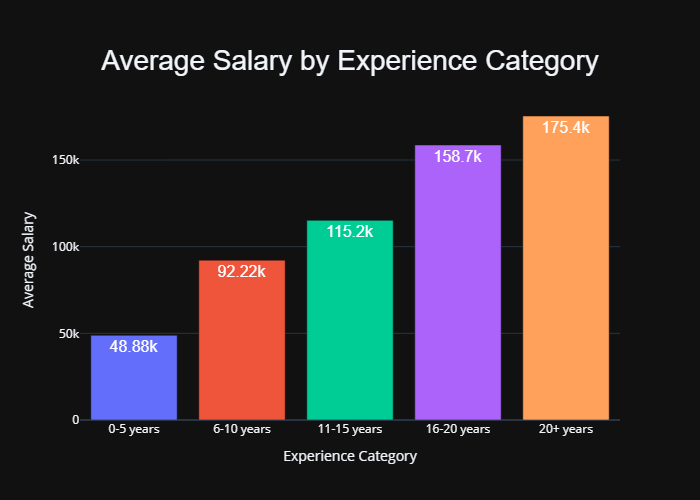

In [22]:
# Create a new column in the DataFrame for the experience categories
df2 = df.copy()
df2['Experience Category'] = df2['Years of Experience'].apply(grouping_exp)

# Aggregate data to find average salary for each experience category
avg_salary_by_exp = df2.groupby('Experience Category', as_index=False)['Salary'].mean().sort_values(by='Salary', ascending=True)

# Create an interactive bar graph for average Salary by Experience Category
fig = px.bar(
    avg_salary_by_exp,
    x='Experience Category',
    y='Salary',
    color='Experience Category',
    title='Average Salary by Experience Category',
    template='plotly_dark',
    labels={'Experience Category': 'Experience Category', 'Salary': 'Average Salary'},
    text_auto = "0.4s" 
)

custom_layout(fig) 

fig.update_traces(
        textfont={
        'size': 16,
        'family': 'Arial',
        'color': '#FFFFFF'  
    },
    hovertemplate='<b>Years of Experience</b>: %{x}<br><b>Salary</b>: $%{y:0.4s}<extra></extra>'
)


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")


#### What is the average salary by job title?

In [23]:
def grouping_age(age):
    """
    Converts age into categories.
    
    Parameters:
    age (int or float): Age.
    
    Returns:
    str: The age category.
    """
    
    age_ranges = [
        (0, 20, "0-20 years"),
        (21, 30, "21-30 years"),
        (31, 40, "31-40 years"),
        (41, 50, "41-50 years"),
        (51, 60, "51-60 years")
    ]
    
    for start, end, label in age_ranges:
        if start <= age <= end:
            return label
    return "60+ years"


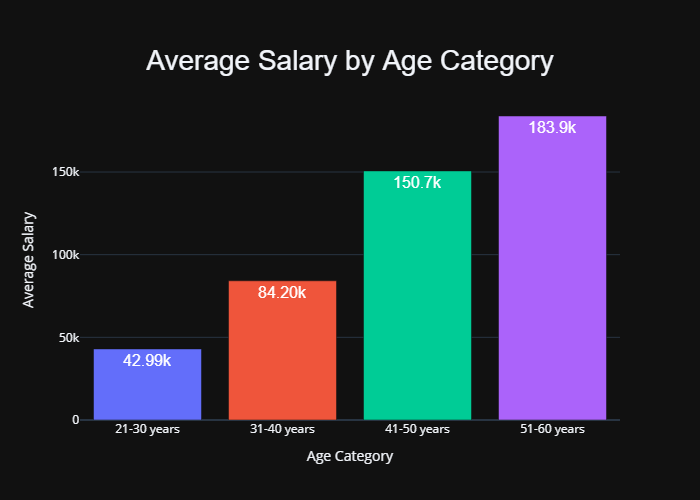

In [24]:
# Create a new column in the DataFrame for the age categories
df2['Age Category'] = df2['Age'].apply(grouping_age)

# Aggregate data to find average salary for each age category
avg_salary_by_age = df2.groupby('Age Category', as_index=False)['Salary'].mean().sort_values(by='Salary', ascending=True)

# Create an interactive bar graph for average Salary by Age Category
fig = px.bar(
    avg_salary_by_age,
    x='Age Category',
    y='Salary',
    color='Age Category',
    title='Average Salary by Age Category',
    template='plotly_dark',
    labels={'Age Category': 'Age Category', 'Salary': 'Average Salary'},
    text_auto = "0.4s" 
)


custom_layout(fig) 


fig.update_traces(
        textfont={
        'size': 16,
        'family': 'Arial',
        'color': '#FFFFFF'  
    },
    hovertemplate='<b>Age</b>: %{x}<br><b>Salary</b>: $%{y:0.4s}<extra></extra>'
)



# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

##### From these questions, we can conclude that age, years of experience, and education level have a significant positive impact on average salary. As employees grow older, gain more experience, and attain higher levels of education, they tend to earn higher wages. Interestingly, the data suggests that gender does not play a notable role in determining salary in this particular dataset, indicating that salaries are primarily influenced by factors related to an individual's qualifications and experience rather than their gender.

### Correlation Analysis

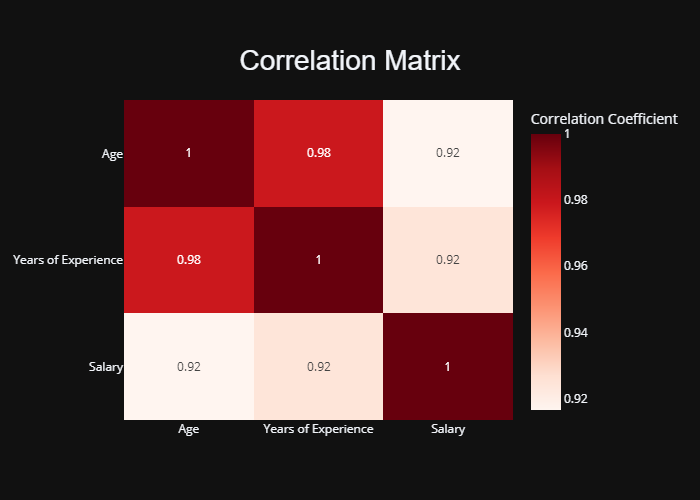

In [25]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Format the correlation matrix to display integers as whole numbers
formatted_corr_matrix = corr_matrix.apply(lambda x: x.apply(lambda y: f"{y:.2f}" if y % 1 else f"{int(y)}"))

# Create an interactive heatmap for the correlation matrix
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    title='Correlation Matrix',
    template='plotly_dark',
    aspect='auto',
    color_continuous_scale="reds",
    labels={'color': 'Correlation Coefficient'}
)

fig.update_traces(text=formatted_corr_matrix.values, texttemplate="%{text}")

custom_layout(fig) 


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

#### Create an interactive scatter matrix

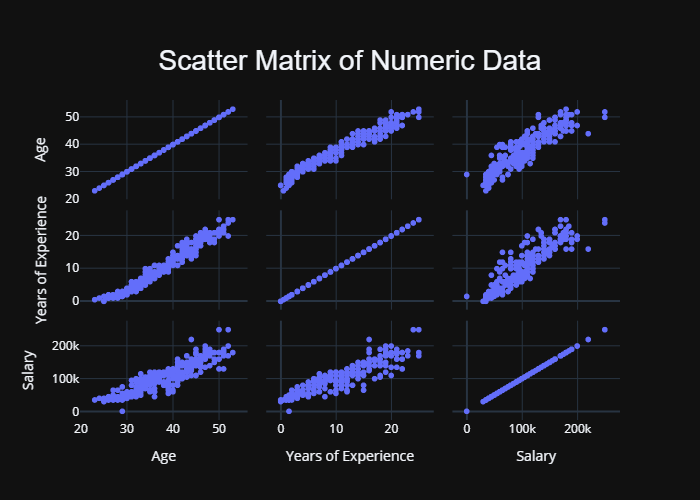

In [26]:
fig = px.scatter_matrix(
    df,
    dimensions=['Age', 'Years of Experience', 'Salary'],
    title='Scatter Matrix of Numeric Data',
    template='plotly_dark'
)

custom_layout(fig) 


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

#### Conclusion on Correlation of Numeric Data
Based on the correlation matrix and scatter matrix, we can observe the following relationships:

1. **Age and Salary**: There is a positive linear correlation between Age and Salary. As the age of individuals increases, their salary tends to increase as well. This suggests that older individuals may have higher salaries, possibly due to accumulated experience and progression in their careers.

2. **Years of Experience and Salary**: Similarly, there is a positive linear correlation between Years of Experience and Salary. This indicates that as individuals gain more years of experience, their salaries tend to rise. This relationship is expected as more experienced individuals typically command higher salaries due to their expertise and contributions to their roles.

These positive correlations suggest that both age and years of experience are important factors contributing to higher salaries. However, it is important to consider that correlation does not imply causation, and other factors such as education level, job title, and industry could also play significant roles in determining salary levels.

### Building Prediction Model

#### Converting Categorical Values to Numerical

In [27]:
df = pd.get_dummies(df, columns=["Education Level"], drop_first=True) * 1
df.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Master's,Education Level_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,0,0
1,28.0,Female,Data Analyst,3.0,65000.0,1,0
2,45.0,Male,Senior Manager,15.0,150000.0,0,1
3,36.0,Female,Sales Associate,7.0,60000.0,0,0
4,52.0,Male,Director,20.0,200000.0,1,0


#### Selecting Features

In [28]:
X = df.drop(columns=["Job Title", "Salary", "Gender"])
y = df['Salary']

In [29]:
X.head()

,Age,Years of Experience,Education Level_Master's,Education Level_PhD
0,32.0,5.0,0,0
1,28.0,3.0,1,0
2,45.0,15.0,0,1
3,36.0,7.0,0,0
4,52.0,20.0,1,0


#### Splitting the Data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Selecting the Best Model to Use

In [31]:
# Define the models in a dictionary
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=500, random_state=123),
    "LogisticRegression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, random_state=123)),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=123),
    "RandomForestClassifier": RandomForestClassifier(random_state=123),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=123),
    "SVC": make_pipeline(StandardScaler(), SVC(random_state=123)),
    "KNeighborsClassifier": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "GaussianNB": make_pipeline(StandardScaler(), GaussianNB())
}

# Create the KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=123)

# Dictionary to store cross-validation scores
scores_dict = {}

# Iterate over each model and calculate cross-validation scores
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)
    mean_score = np.mean(scores)
    scores_dict[model_name] = mean_score
    print(f"Model: {model_name}, Cross Validation Score: {mean_score*100:.2f}%")

# Determine the best model based on cross-validation score
best_model_name = max(scores_dict, key=scores_dict.get)
best_score = scores_dict[best_model_name]

print(f"\nBest Model: {best_model_name}, Cross Validation Score: {best_score*100:.2f}%")

Model: RandomForestRegressor, Cross Validation Score: 86.36%
Model: LogisticRegression, Cross Validation Score: 18.20%
Model: DecisionTreeClassifier, Cross Validation Score: 30.87%
Model: RandomForestClassifier, Cross Validation Score: 31.79%
Model: GradientBoostingClassifier, Cross Validation Score: 31.21%
Model: SVC, Cross Validation Score: 19.20%
Model: KNeighborsClassifier, Cross Validation Score: 30.26%
Model: GaussianNB, Cross Validation Score: 10.47%

Best Model: RandomForestRegressor, Cross Validation Score: 86.36%


#### Using the Best Model

In [32]:
# Create the KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=123)

In [33]:
rfr = RandomForestRegressor(n_estimators=500, random_state=123)

In [34]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=123)

In [35]:
score = rfr.score(X_train, y_train) * 100
print(f"Score: {score:.2f}%")

Score: 94.97%


#### Time to Predict!

In [36]:
pred_salary = rfr.predict(X_test)

# Create a DataFrame to store actual salary, predicted salary, error, percentage error
results_df = pd.DataFrame({
    'Actual Salary': y_test,
    'Predicted Salary': pred_salary,
    'Error': y_test - pred_salary,
    'Percentage Error': np.abs((y_test - pred_salary) / y_test) * 100
})

print(results_df.head())


     Actual Salary  Predicted Salary         Error  Percentage Error
20         80000.0      75940.975469   4059.024531          5.073781
11        140000.0     142112.380952  -2112.380952          1.508844
94         75000.0      92580.285714 -17580.285714         23.440381
292        40000.0      42507.615079  -2507.615079          6.269038
240       120000.0      90556.357143  29443.642857         24.536369


#### Calculate the model score on the test set

In [37]:
test_score = rfr.score(X_test, y_test) * 100
print(f"Test Score: {test_score:.2f}%")


Test Score: 84.82%


#### Plot the Actual Salary vs. Predicted Salary

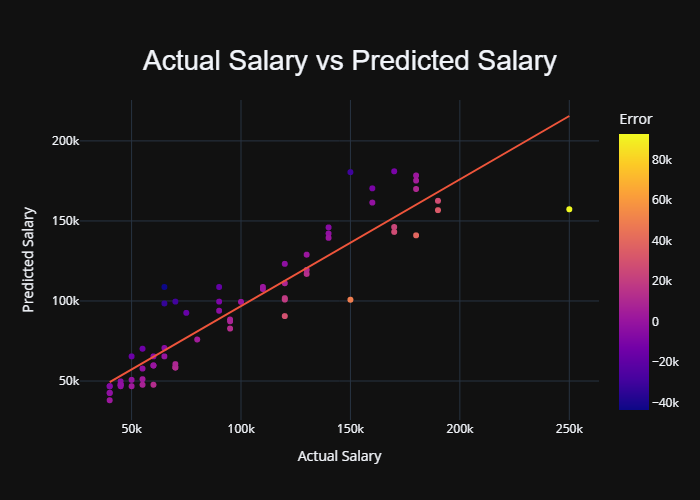

In [45]:
fig = px.scatter(
    results_df, 
    x='Actual Salary', 
    y='Predicted Salary', 
    title='Actual Salary vs Predicted Salary',
    labels={'x': 'Actual Salary', 'y': 'Predicted Salary'},
    color='Error',
    template='plotly_dark',
    trendline='ols')

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "arial"
        },
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
)

for trace in fig.data:
    if trace.mode == 'markers':
        trace.update(
            hovertemplate=(
                '<b>Actual Salary:</b> %{x:$,.2f}<br>'
                '<b>Predicted Salary:</b> %{y:$,.2f}<br>'
                '<b>Error:</b> %{marker.color:.2f}<br>'
                '<b>Percentage Error:</b> %{customdata[0]:.2f}%<extra></extra>'
            ),
            customdata=results_df[['Percentage Error']].to_numpy()
        )
    elif trace.mode == 'lines':
        trace.update(
            hovertemplate=(
                '<b>OLS Trendline</b><br>'
                '<b>Actual Salary:</b> %{x:$,.2f}<br>'
                '<b>Predicted Salary:</b> %{y:$,.2f}<br>'
                '<extra></extra>'
            )
        )


# Uncomment the line below to display the interactive plot (e.g., when running locally or in a Jupyter notebook)
# iplot(fig)

# Since GitHub does not support interactive Plotly plots, render the plot as a static PNG image
pio.show(fig, renderer="png")

#### Save the trained RandomForestRegressor model 

In [40]:
# Save the trained RandomForestRegressor model to a file named "model.pkl" using the pickle format.
# This allows the model to be loaded and used later without retraining.
# `rfr` is the RandomForestRegressor model instance.
# The pickle file will be used in the prediction app.

pd.to_pickle(rfr, "model.pkl")